## <h1><center>Data Discovery & Visualisation</center></h1>
<h2><center>Assignment 2</center></h2>
<h3><center>Isaac Khoo - S10244252C</center></h3>

# Note:

- If the ipywidget buttons cause an error, rerun the whole notebook
- If some visualisations dont work make sure the notebook is trusted (File > Trusted Notebook)

# Youtube Video

In [56]:
from IPython.display import HTML, IFrame

video_url = "https://www.youtube.com/embed/fL8jjjkVbOw"
iframe_code = f'<iframe width="560" height="315" src="{video_url}" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'

HTML(iframe_code)

# Table Of Contents

<a id="top"></a>
## 1. [Project objectives](#part1)
   - [1.1 Background](#part1.1)  
   - [1.2 Business/Research Questions](#part1.2)
   - [1.3 Metadata](#part1.3)
   
## 2. [Data Preparation](#part2)
   - [2.1 Exploring the Data](#part2.1)  
   - [2.2 Data Cleaning](#part2.2)
   
## 3. [Data Visualisation](#part3)
   - [3.1 Customer Sales Analysis](#part3.1)
   - [3.2 Product & Sales Analysis](#part3.2)
   - [3.3 Customer Analysis](#part3.3)
   
## 4. [Dashboard](#part4)
   - [4.1 Customer Sales Analysis Dashboard](#part4.1)
   - [4.2 Product & Sales Analysis Dashboard](#part4.2)
   - [4.3 Customer Analysis Dashboard](#part4.3)
 
   
## 5. [Reflection](#part5)

# 1 Project objectives <a id="part1"></a>

[Back To Top](#top)

## 1.1 Background <a id="part1.1"></a>

You are part of the market research team for Cardio Good Fitness, a retail 
business specializing in the sales of treadmills. The team has collected data on individuals 
who purchased a treadmill at the Cardio Good Fitness retail stores for the past three months. 
The data is stored in the cardio_good_fitness.csv file. Through data preparation, exploration 
and visualisation, the market research team decides to investigate whether there are 
differences across the product lines with respect to customer characteristics. 

## 1.2 Business/Research Questions <a id="part1.2"></a>

### 1.21 Customer Sales Analysis

1. How does the annual household income of customers correlate with the treadmill model they purchase
2. What is the average usage frequency of treadmills among customers? Are there any differences between treadmill models?
3. Does the marital status of customers affect their choice of treadmill model
4. What is the average age and education level of customers in different branches?

### 1.22 Product & Sales Analysis

1. Which branch location (North, South, East, or West) has the highest sales or customer engagement?
2. How does the choice of treadmill model vary by branch location
3. What percentage of all sales is each Treadmill Model
4. Is there a correlation between average miles walked/ran and the treadmill model chosen by customers?

### 1.23 Customer Analysis 
1. What is their fitness level of customers over the ranges of ages
2. How does income level impact usage frequency and average miles walked/run?
3. Are customers with higher education levels more engaged with their treadmills in terms of usage frequency and miles walked/run?
4. How does marital status influence usage behavior and fitness?

## 1.3 Metadata <a id="part1.3"></a>

| Column | Description |
| :--- | ---: |
| Product | Model of treadmill purchased (TM195, TM498, or TM798) 
| Branch | Branch location where purchase is made (North, South, East or West) 
| Gender | Gender of customer (Male or Female)
| Age | Age of customer in years (integer values)
| Education | Number of years of education customer had completed (integer values)
| MaritalStatus | Marital status of customer (Single or Partnered)
| Usage | Average number of times the customer plans to use the treadmill each week (integer values)
| Fitness | Customer’s self-rated fitness on a 1-to-5 scale (1: very unfit; 5: very fit)
| Income | Customer’s annual household income (integer values)
| Miles |  Average number of miles the customer expects to walk/run each week (integer values)

# 2 Data Preparation <a id="part2"></a>

[Back To Top](#top)

In [2]:
# Downlaoding libraries
!pip install colour
!pip install squarify
!pip install plotly
!pip install folium pandas
!pip install ipywidgets
!pip install seaborn

In [3]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
import seaborn as sns
import plotly.express as px
from colour import Color
import squarify
import folium
import ipywidgets as widgets
from matplotlib.gridspec import GridSpec


import warnings
warnings.filterwarnings('ignore')

## 2.1 Exploring the Data <a id="part2.1"></a>

### 2.11 Data Overview

In [4]:
df = pd.read_csv('cardio_good_fitness.csv')

pd.set_option("display.max_columns", None) #Showing all columns

df.head()

,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,West,18,Male,14,Single,NaN,4,29562,112
1,TM195,East,19,Male,15,Single,2,3,31836,75
2,TM195,West,19,Female,14,P,4,3,30699,66
3,TM195,South,na,na,na,na,na,na,na,na
4,TM195,West,19,Male,12,S,NaN,3,32973,85


In [5]:
print(df.info())
print("")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        183 non-null    object
 1   Branch         183 non-null    object
 2   Age            180 non-null    object
 3   Gender         183 non-null    object
 4   Education      183 non-null    object
 5   MaritalStatus  183 non-null    object
 6   Usage          175 non-null    object
 7   Fitness        183 non-null    object
 8   Income         183 non-null    object
 9   Miles          183 non-null    object
dtypes: object(10)
memory usage: 14.4+ KB
None



,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,183,183,180,183,183,183,175,183,183,183
unique,3,4,32,3,9,5,7,6,63,38
top,TM195,South,25,Male,16,Partnered,3,3,45480,85
freq,81,50,25,104,85,102,61,97,14,27


### 2.12 Product Column

In [6]:
df.Product.describe()

count       183
unique        3
top       TM195
freq         81
Name: Product, dtype: object

In [7]:
df.Product.unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

### 2.13 Branch Column

In [8]:
df.Branch.describe()

count       183
unique        4
top       South
freq         50
Name: Branch, dtype: object

In [9]:
df.Branch.unique()

array(['West', 'East', 'South', 'North'], dtype=object)

### 2.14 Gender Column

In [10]:
df.Gender.describe()


count      183
unique       3
top       Male
freq       104
Name: Gender, dtype: object

In [11]:
df.Gender.unique()

array(['Male', 'Female', 'na'], dtype=object)

### 2.15 Education column

In [12]:
df.Education.describe()

count     183
unique      9
top        16
freq       85
Name: Education, dtype: object

In [13]:
df.Education.unique()

array(['14', '15', 'na', '12', '13', '16', '18', '20', '21'], dtype=object)

### 2.16 MaritalStatus column

In [14]:
df.MaritalStatus.describe()

count           183
unique            5
top       Partnered
freq            102
Name: MaritalStatus, dtype: object

In [15]:
df.MaritalStatus.unique()

array(['Single', 'P', 'na', 'S', 'Partnered'], dtype=object)

### 2.17 Usage Column

In [16]:
df.Usage.describe()

count     175
unique      7
top         3
freq       61
Name: Usage, dtype: object

In [17]:
df.Usage.unique()

array([nan, '2', '4', 'na', '3', '5', '6', '7'], dtype=object)

### 2.18 Fitness Column

In [18]:
df.Fitness.describe()

count     183
unique      6
top         3
freq       97
Name: Fitness, dtype: object

In [19]:
df.Fitness.unique()

array(['4', '3', 'na', '2', '1', '5'], dtype=object)

### 2.19 Income Column & Miles Colunmn

In [20]:
print(df.Income.describe())
print()
print(df.Income.unique())

count       183
unique       63
top       45480
freq         14
Name: Income, dtype: object

['29562' '31836' '30699' 'na' '32973' '35247' '37521' '36384' '38658'
 '40932' '34110' '39795' '42069' '44343' '45480' '46617' '48891' '53439'
 '43206' '52302' '51165' '50028' '54576' '68220' '55713' '60261' '67083'
 '56850' '59124' '61398' '57987' '64809' '47754' '65220' '62535' '48658'
 '54781' '48556' '58516' '53536' '61006' '57271' '52291' '49801' '62251'
 '64741' '70966' '75946' '74701' '69721' '83416' '88396' '90886' '92131'
 '77191' '52290' '85906' '103336' '99601' '89641' '95866' '104581' '95508']


In [21]:
print(df.Miles.describe())
print()
print(df.Miles.unique())

count     183
unique     38
top        85
freq       27
Name: Miles, dtype: object

['112' '75' '66' 'na' '85' '47' '141' '103' '94' '113' '38' '188' '56'
 '132' '169' '64' '53' '106' '95' '212' '42' '127' '74' '170' '21' '120'
 '200' '140' '100' '80' '160' '180' '240' '150' '300' '280' '260' '360']


## Changes to be made

#### General Changes
 - Replace all empty values with NA/NAn
 - Removed rows with NA/NAN values
 - Marital status values

## 2.2 Data Cleaning <a id="part2.2"></a>

[Back To Top](#top)

### 2.21 General Changes 

#### Replacing all Empty Values as NA/NAN

In [22]:
df.replace('', np.nan)

,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,West,18,Male,14,Single,NaN,4,29562,112
1,TM195,East,19,Male,15,Single,2,3,31836,75
2,TM195,West,19,Female,14,P,4,3,30699,66
3,TM195,South,na,na,na,na,na,na,na,na
4,TM195,West,19,Male,12,S,NaN,3,32973,85
...,...,...,...,...,...,...,...,...,...,...
178,TM798,East,40,Male,21,Single,6,5,83416,200
179,TM798,West,42,Male,18,Single,5,4,89641,200
180,TM798,East,45,Male,16,S,5,5,90886,160
181,TM798,North,47,Male,18,Partnered,4,5,104581,120


#### Removed all rows with NA/NAN Values

In [23]:
df.isnull().any()

Product          False
Branch           False
Age               True
Gender           False
Education        False
MaritalStatus    False
Usage             True
Fitness          False
Income           False
Miles            False
dtype: bool

In [24]:
df = df.dropna()

In [25]:
df.isnull().any()

Product          False
Branch           False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 1 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        172 non-null    object
 1   Branch         172 non-null    object
 2   Age            172 non-null    object
 3   Gender         172 non-null    object
 4   Education      172 non-null    object
 5   MaritalStatus  172 non-null    object
 6   Usage          172 non-null    object
 7   Fitness        172 non-null    object
 8   Income         172 non-null    object
 9   Miles          172 non-null    object
dtypes: object(10)
memory usage: 14.8+ KB


#### Changing Values in Marital Status to either Single or Partnered

In [27]:
df['MaritalStatus'].replace('S','Single',inplace = True)

In [28]:
df['MaritalStatus'].replace('P','Partnered',inplace = True)

In [29]:
df.tail()

,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
178,TM798,East,40,Male,21,Single,6,5,83416,200
179,TM798,West,42,Male,18,Single,5,4,89641,200
180,TM798,East,45,Male,16,Single,5,5,90886,160
181,TM798,North,47,Male,18,Partnered,4,5,104581,120
182,TM798,South,48,Male,18,Partnered,4,5,95508,180


In [30]:
print(df['Income'].dtype)

object


In [31]:
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

In [32]:
df['Usage'] = pd.to_numeric(df['Usage'], errors='coerce')

In [33]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [34]:
df['Education'] = pd.to_numeric(df['Education'], errors='coerce')

In [35]:
df['Fitness'] = pd.to_numeric(df['Fitness'], errors='coerce')

In [36]:
df['Miles'] = pd.to_numeric(df['Miles'], errors='coerce')

In [37]:
df = df.dropna()

# 3 Data Visualisation <a id="part3"></a>

[Back To Top](#top)

In [38]:
from matplotlib.gridspec import GridSpec

In [39]:
mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use('seaborn-pastel')

## 3.1 Customer Sales Analysis <a id="part3.1"></a>

[Back To Top](#top)

### 3.11 How does the annual household income of customers correlate with the treadmill model they purchase

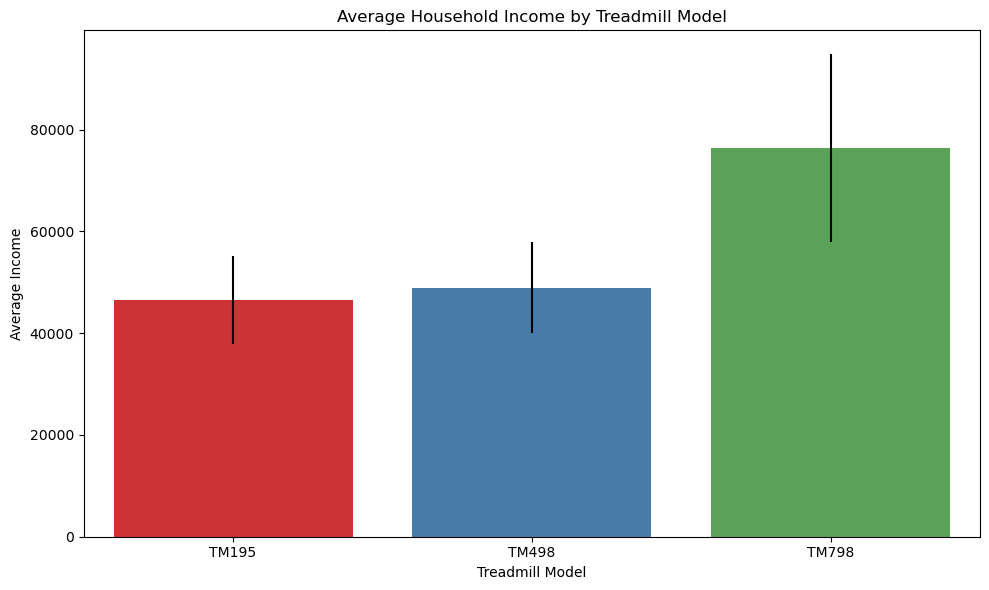

In [40]:
income_stats = df.groupby('Product')['Income'].agg(['mean', 'std'])

# Create a grouped bar chart with error bars
plt.figure(figsize=(10, 6))
sns.barplot(data=income_stats, x=income_stats.index, y='mean', yerr=income_stats['std'], capsize=0.2, palette='Set1')

plt.title('Average Household Income by Treadmill Model')
plt.xlabel('Treadmill Model')
plt.ylabel('Average Income')

plt.tight_layout()
plt.show()

Figure 3.11 This chart shows how much money people who buy different treadmill models typically make. A grouped bar chart with error bars is used to display the average income of people who bought that model and the income variation among buyers. From the chart it can be deduced that model TM798 has the buyers of highest average income and  highest income variation among buyers.

### 3.12 What is the average usage frequency of treadmills among customers? Are there any differences between treadmill models?

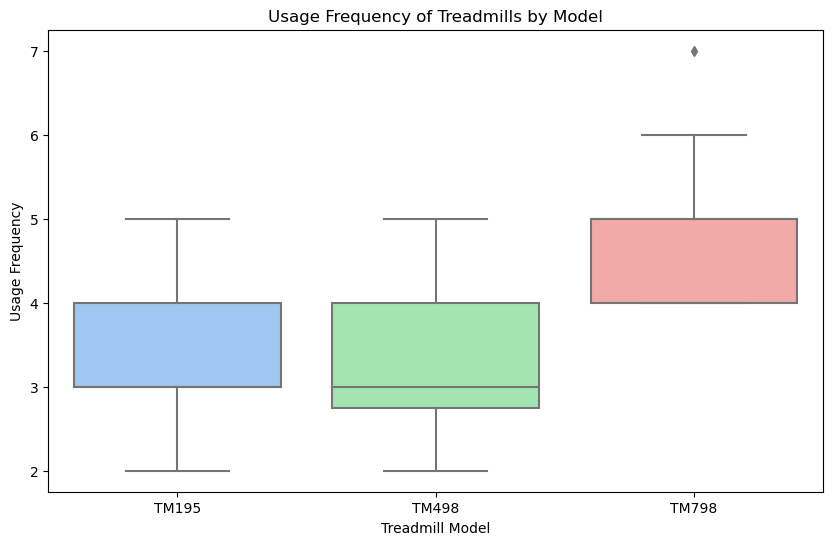

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product', y='Usage')
plt.title('Usage Frequency of Treadmills by Model')
plt.xlabel('Treadmill Model')
plt.ylabel('Usage Frequency')
plt.show()

Figure 3.12 This chart Shows the Average usage frequency of the treadmills by model. A Box and whiskers chart is used to display the median, lower and upper quartiles, and lower and upper extremes of the Usage frequencies. From the chart it can be deduced that those who bought model TM798 had highest intended average usage frequency.

### 3.13 Does the marital status of customers affect their choice of treadmill model

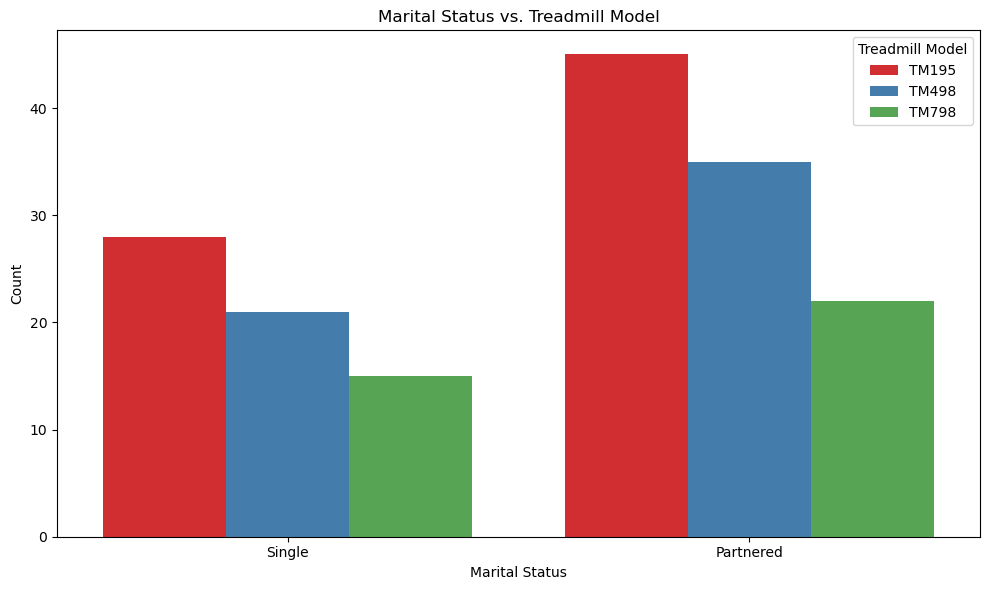

In [42]:
# Create a grouped bar plot with stacked bars to visualize marital status and treadmill model distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MaritalStatus', hue='Product', palette='Set1', saturation=0.8)

plt.title('Marital Status vs. Treadmill Model')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Treadmill Model')

plt.tight_layout()
plt.show()

Figure 3.13 This chart shows the number of Treadmills bought for each model for those Single or Partnered. A grouped bar plot is used to visualize marital status and treadmill model distribution. From the chart I can deduce that partnered customers are more likely to order than single customers and especially model TM195.

### 3.14 What is the average age and education level of customers in different branches?

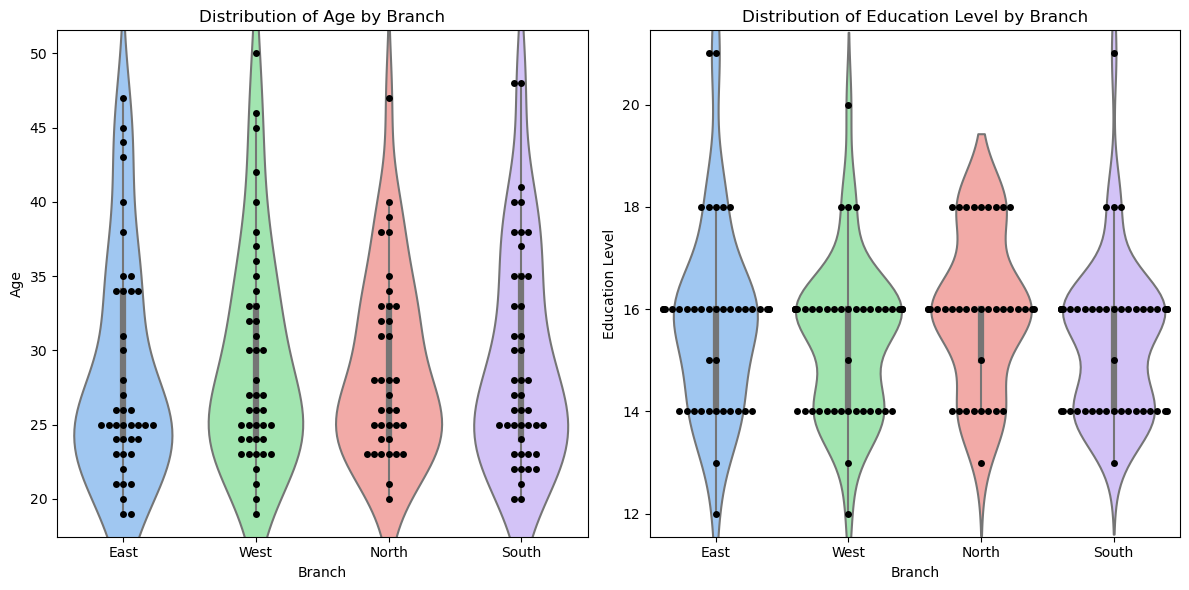

In [43]:
plt.figure(figsize=(12, 6))

# Violin plot for average age by branch
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='Branch', y='Age')
sns.swarmplot(data=df, x='Branch', y='Age', color='black')  # Add swarm plot for detailed data points
plt.title('Distribution of Age by Branch')
plt.xlabel('Branch')
plt.ylabel('Age')

# Violin plot for average education level by branch
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='Branch', y='Education')
sns.swarmplot(data=df, x='Branch', y='Education', color='black')
plt.title('Distribution of Education Level by Branch')
plt.xlabel('Branch')
plt.ylabel('Education Level')

plt.tight_layout()
plt.show()

Figure 3.14 This chart displays the average age and education level of customers in different branches. A side-by-side pair of violin plots is used to visualize average age by branch and average education level by branch. From the chart i can deduce that the distribution of ages and number of years of education for all branches are around the same.

## 3.2 Product & Sales Analysis <a id="part3.2"></a>

[Back To Top](#top)

### 3.21  Are there any geographical trends in treadmill purchases?

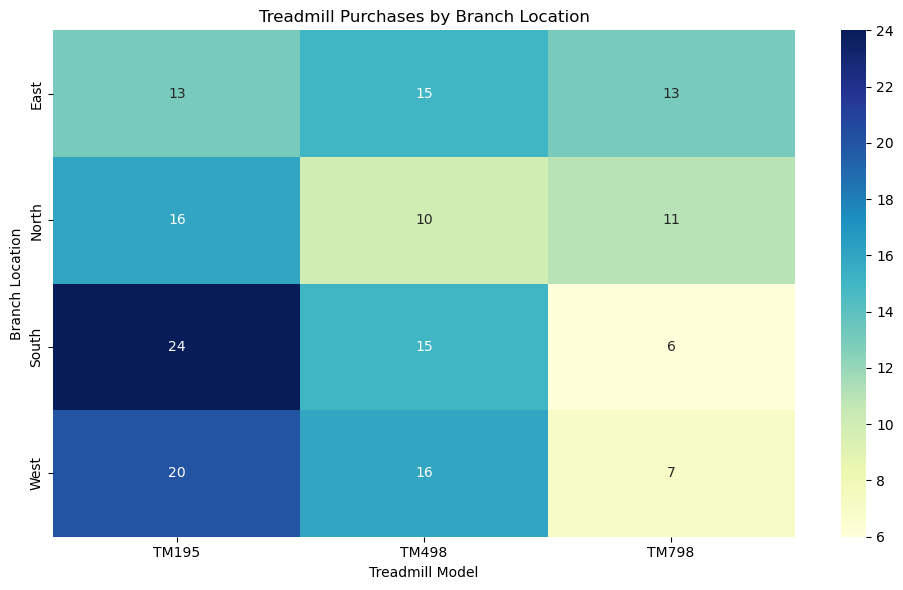

In [44]:
pivot_table = df.pivot_table(index='Branch', columns='Product', values='Income', aggfunc='count', fill_value=0)

# Create a heatmap to visualize treadmill purchases by branch
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_table, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Treadmill Purchases by Branch Location')
plt.xlabel('Treadmill Model')
plt.ylabel('Branch Location')

plt.tight_layout()
plt.show()

Fig 3.21 This chart displays the number of treadmill purchases by branch. A Heatmap is used to visualise the count of treadmill purchases for each brant for each model. From the chart i can deduce that the model TM195 is the most sought after model with the south branch having the most purchases.

### 3.22 How does the choice of treadmill model vary by branch location

<Figure size 1000x600 with 0 Axes>

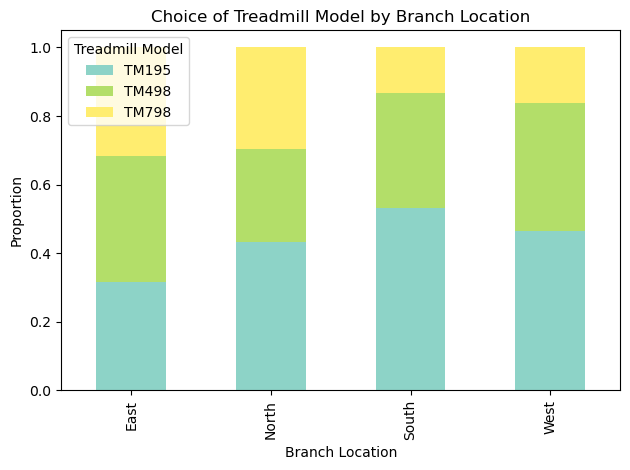

In [45]:
cross_tab = pd.crosstab(df['Branch'], df['Product'], normalize='index')

# Create a stacked bar plot to visualize choice of treadmill model by branch location
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, cmap='Set3')

plt.title('Choice of Treadmill Model by Branch Location')
plt.xlabel('Branch Location')
plt.ylabel('Proportion')
plt.legend(title='Treadmill Model')

plt.tight_layout()
plt.show()

Fig 3.22 This chart displays the Choice of Treadmill Model for each location branch. A Stacked bar plot is used to visualize choice of treadmill model by branch location. From this chart I can see that generally for each branch the model TM798 has the least purchases.

### 3.23 What percentage of all sales is each Treadmill Model

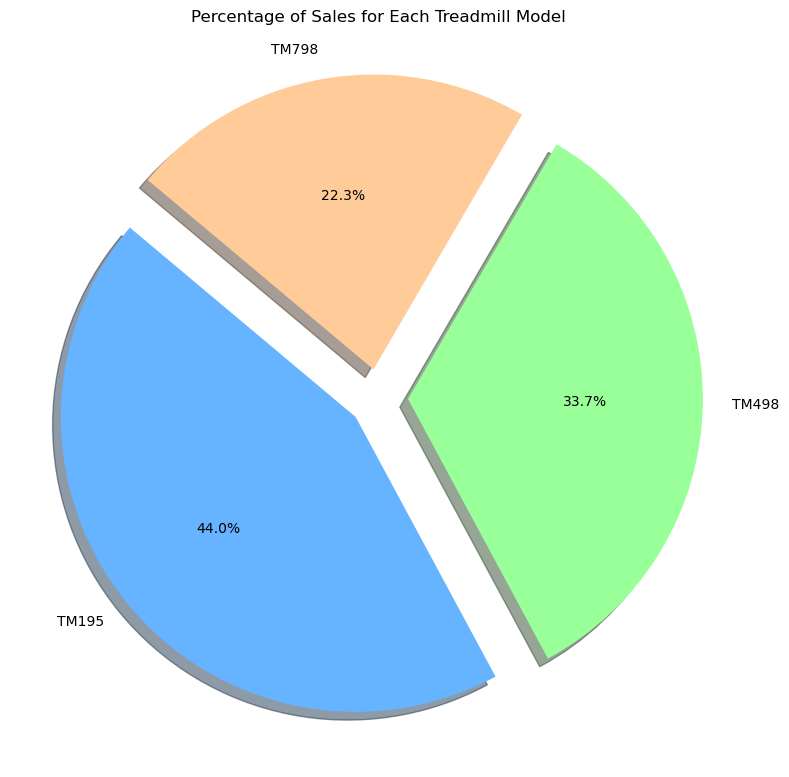

In [46]:
sales_percentage = df['Product'].value_counts(normalize=True) * 100

# Create a pie chart with explode and shadow
plt.figure(figsize=(8, 8))
plt.pie(sales_percentage, labels=sales_percentage.index, autopct='%.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ffcc99'], explode=(0.1, 0.1, 0.1), shadow=True)
plt.title('Percentage of Sales for Each Treadmill Model')

plt.tight_layout()
plt.show()

Figure 3.23 Displays the Percentage of Sales for each TreadMill Model. A Pie chart is used to visualise the different percentages of all Treadmills sold with the slices representing the Treadmill models. From this chart I can deduce that TM195 is the most popular model followed by TM498 and TM798.

### 3.24 Is there a correlation between average miles walked/ran and the treadmill model chosen by customers?

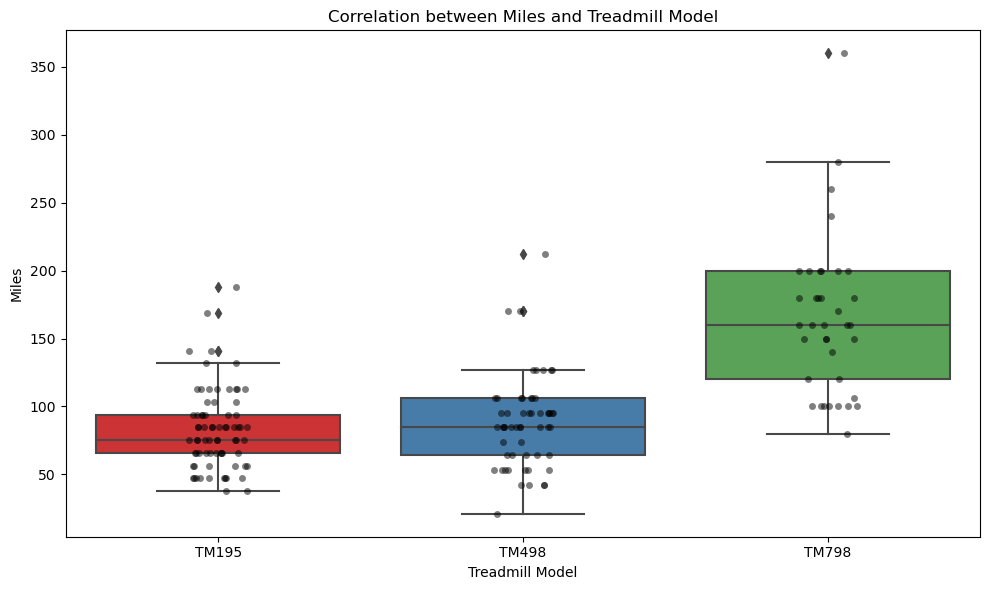

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product', y='Miles', palette='Set1')
sns.stripplot(data=df, x='Product', y='Miles', color='black', alpha=0.5)

plt.title('Correlation between Miles and Treadmill Model')
plt.xlabel('Treadmill Model')
plt.ylabel('Miles')

plt.tight_layout()
plt.show()

Figure 3.24 Displays Correlation between Average Miles and Treadmill Model. A combination of a box and whiskers plot and scatter plot is used to visualise the median, lower and upper quartiles, and lower and upper extremes and distribution of each Treadmill Model. From this we can see that TM798 has the highest average expected miles ran and TM195 having the most concentrated number of people's intended miles to run.

## 3.3 Customer Analysis <a id="part3.3"></a>

[Back To Top](#top)

### 3.31 What is the fitness level of customers over the ranges of ages

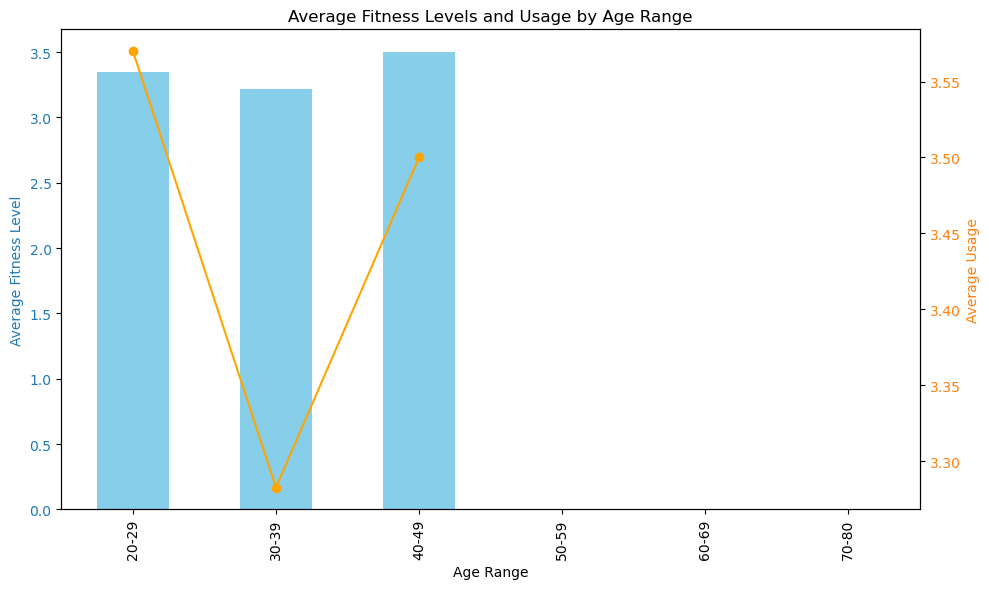

In [48]:
# Define age ranges
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-80']

# Create a new column 'AgeRange' to categorize age into ranges
df['AgeRange'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calculate average fitness levels and usage for each age range
average_fitness_by_age = df.groupby('AgeRange')['Fitness'].mean()
average_usage_by_age = df.groupby('AgeRange')['Usage'].mean()

# Create subplots with a clustered bar plot and line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the clustered bar plot for fitness levels
average_fitness_by_age.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_xlabel('Age Range')
ax1.set_ylabel('Average Fitness Level', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the line plot for usage
ax2 = ax1.twinx()
average_usage_by_age.plot(kind='line', marker='o', color='orange', ax=ax2)
ax2.set_ylabel('Average Usage', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set overall title and tight layout
plt.title('Average Fitness Levels and Usage by Age Range')
plt.tight_layout()

plt.show()


Figure 3.31 shows the average fitness levels and usage over the range of ages. A Dual Axis plot consisting of a bar chart and a line graph is used to show the average fitness level and usage over a set of age ranges. From this plot we can see ages 40-49 has the highest average fitness level however ages 20-29 has the highest average usage expexted.

### 3.32 How does income level impact average miles walked/run?

<Figure size 1000x600 with 0 Axes>

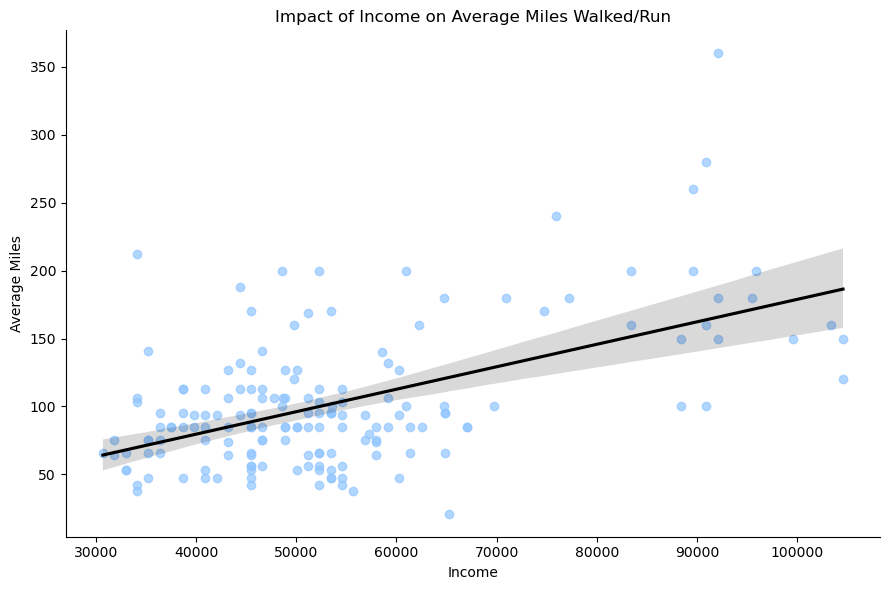

In [49]:
plt.figure(figsize=(10, 6))

# Create a scatter plot with regression lines for each income level
sns.lmplot(data=df, x='Income', y='Miles', height=6, aspect=1.5, scatter_kws={'alpha':0.7}, line_kws={'color':'black'})

# Set titles and labels
plt.title('Impact of Income on Average Miles Walked/Run')
plt.xlabel('Income')
plt.ylabel('Average Miles')

plt.tight_layout()
plt.show()

Figure 3.32 shows the Average expected Miles walked/run against income fir every customer. A scatter plot with regression lines for each income level is used to visualize how the expected miles walked/run by customers may change as their income level increases. From this plot we are able to see that the Average expected miles walked/run by customers increases as their income increases.

### 3.33 Are customers with higher education levels more engaged with their treadmills in terms of  miles walked/run?

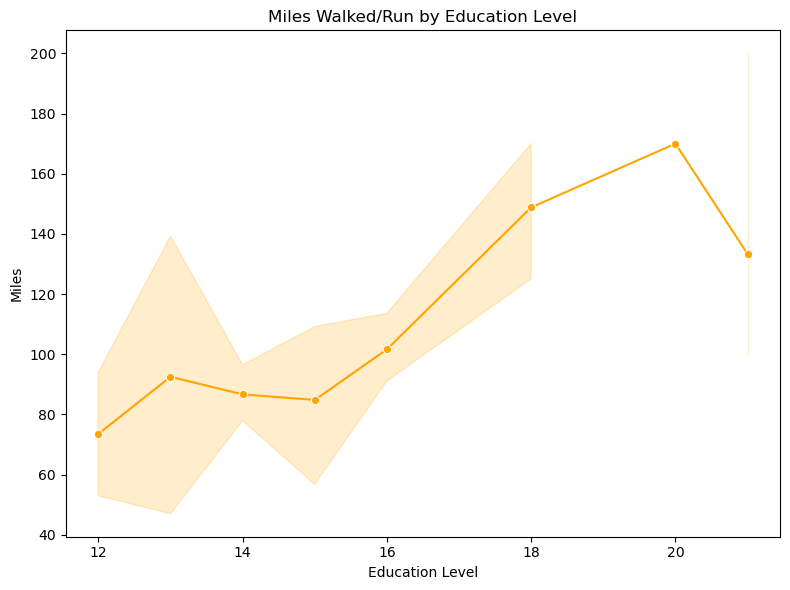

In [50]:
# Create a figure and axis for the line graph
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Line graph for average miles walked/run by education level
sns.lineplot(data=df, x='Education', y='Miles', ax=ax, color='orange', marker='o')
ax.set_title('Miles Walked/Run by Education Level')
ax.set_xlabel('Education Level')
ax.set_ylabel('Miles')

plt.tight_layout()
plt.show()

Figure 3.33 shows the Miles expected by customers as their education level increases. A line graph is used to show how the education level impacts a customers expected average miles ran. From this chart we are able to deduce that as the level of education increases, the customer expects to run more Miles. However, after the 20 year mark of education the expectation of miles ran decreases.

### 3.34 How does marital status influence usage behavior and fitness?

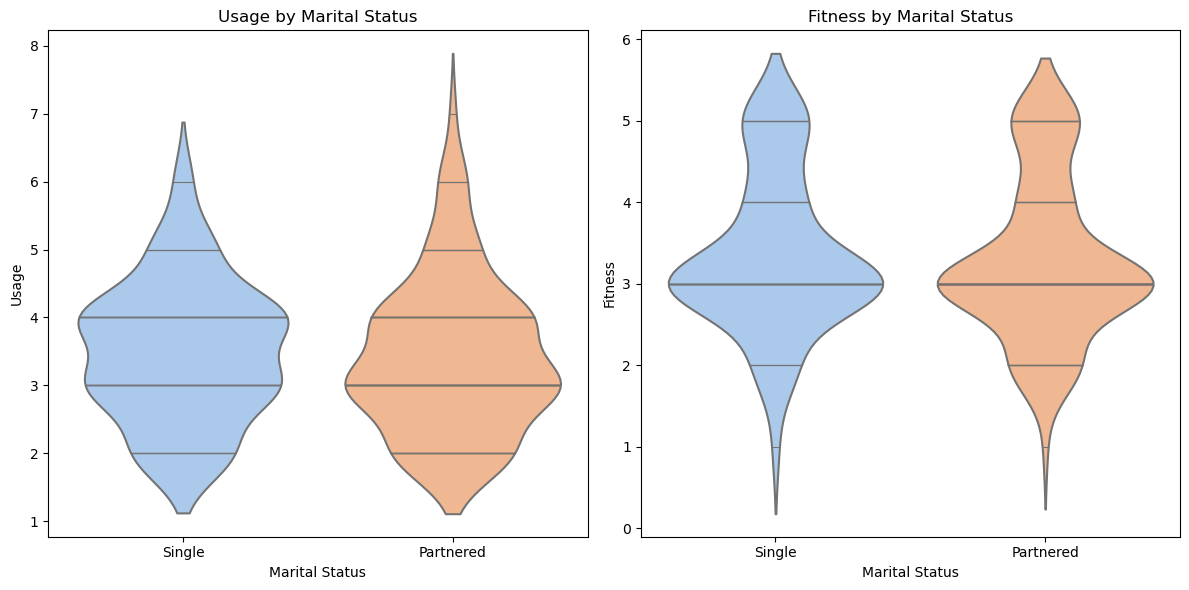

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Violin plot with jittered data points for usage behavior by marital status
sns.violinplot(data=df, x='MaritalStatus', y='Usage', ax=axes[0], inner='stick', palette='pastel')
axes[0].set_title('Usage by Marital Status')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Usage')

# Violin plot with jittered data points for fitness by marital status
sns.violinplot(data=df, x='MaritalStatus', y='Fitness', ax=axes[1], inner='stick', palette='pastel')
axes[1].set_title('Fitness by Marital Status')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Fitness')

plt.tight_layout()
plt.show()

Figure 3.34 shows how the marital status of a customer infulences their usage behaviour and fitness. A dual violin plot is used for usage behavior by marital status and fitness by marital status. From this chart I can deduce that the main portion of customers who are single plan to use the treadmill more than the main portion of customers who are partnered. However I can also deduce that the marital status does not really affect a customers fitness.

# 4 Dashboard <a id="part4"></a>

[Back To Top](#top)

## 4.1 Customer Sales Analysis <a id="part4.1"></a>

[Back To Top](#top)

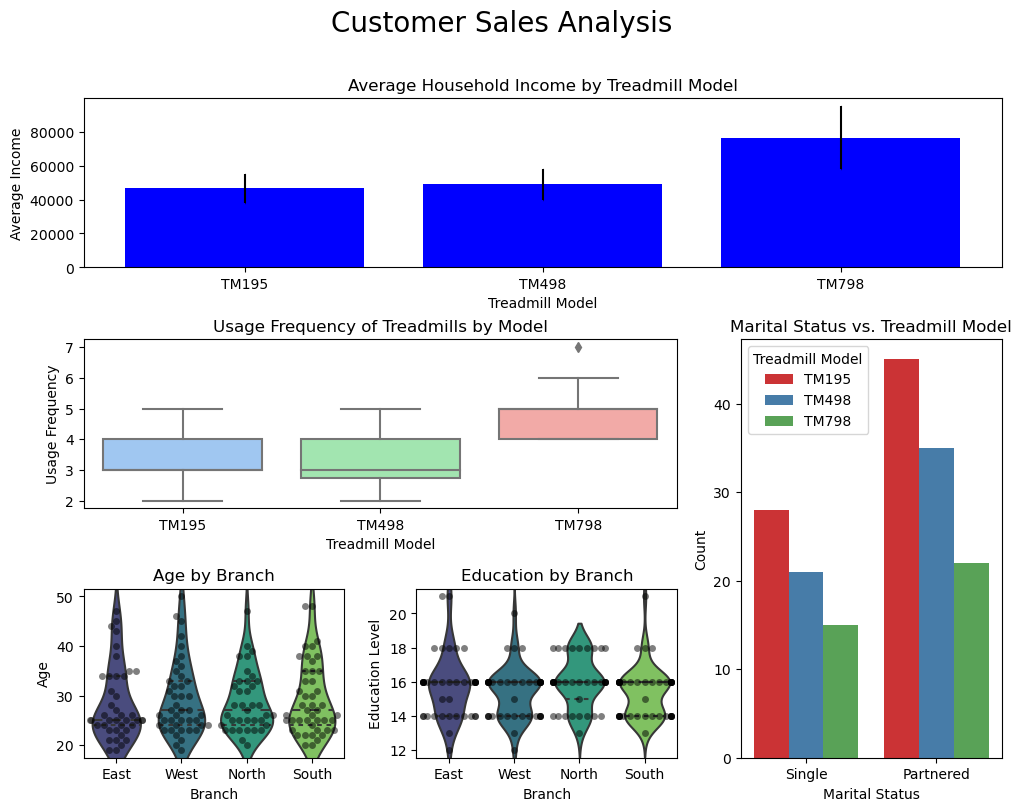

In [52]:
# import GridSpec package from matplotlib
from matplotlib.gridspec import GridSpec

# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(10, 8), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=3, figure=fig)

# Define subplots and their corresponding positions
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])

# Visualize average income by treadmill model using bar chart
income_stats = df.groupby('Product')['Income'].agg(['mean', 'std'])
ax1.bar(income_stats.index, income_stats['mean'], yerr=income_stats['std'], capsize=0.2, color='blue')
ax1.set_title('Average Household Income by Treadmill Model')
ax1.set_xlabel('Treadmill Model')
ax1.set_ylabel('Average Income')

# Visualize usage frequency of treadmills by model using box plot
sns.boxplot(data=df, x='Product', y='Usage', ax=ax2)
ax2.set_title('Usage Frequency of Treadmills by Model')
ax2.set_xlabel('Treadmill Model')
ax2.set_ylabel('Usage Frequency')

# Visualize marital status vs. treadmill model using grouped bar plot
sns.countplot(data=df, x='MaritalStatus', hue='Product', ax=ax3, palette='Set1')
ax3.set_title('Marital Status vs. Treadmill Model')
ax3.set_xlabel('Marital Status')
ax3.set_ylabel('Count')
ax3.legend(title='Treadmill Model')

# Visualize distribution of age and education level by branch using violin plots
sns.violinplot(data=df, x='Branch', y='Age', ax=ax4, inner='quartile', palette='viridis')
sns.swarmplot(data=df, x='Branch', y='Age', ax=ax4, color='black', alpha=0.5)
ax4.set_title('Age by Branch')
ax4.set_xlabel('Branch')
ax4.set_ylabel('Age')

# Add your fifth visualization here (you can adjust its position and customize it)
sns.violinplot(data=df, x='Branch', y='Education', ax=ax5, inner='quartile', palette='viridis')
sns.swarmplot(data=df, x='Branch', y='Education', ax=ax5, color='black', alpha=0.5)
ax5.set_title('Education by Branch')
ax5.set_xlabel('Branch')
ax5.set_ylabel('Education Level')

fig.suptitle("Customer Sales Analysis \n", fontsize=20)

# Adjust layout and spacing
plt.show()


Figure 4.1 shows the Customer Sales Analysis Dashboard. This dashboard is used to provide viewers with a general understanding of the Customer and reasons for why they may have bought the Treadmill. There are 5 visuals in this dashboard:

1. Grouped Bar Chart with error bars
- This chart shows the average income of those who buy each type of Treadmill
- This chart shows the average income variation of customers
- This chart can be used to identify which model customers of different Incomes may like more.
2. Box and Whiskers plot
- This chart shows the average usage frequency of the treadmills by model
- This chart can help identify which model that customer with more intended usage frequencies may prefer.
3. Bar Chart
- This chart shows the number of Treadmills bought for each model for those Single or Partnered.
- From this chart, we can see that partnered customers are more likely to buy than single customers.
4. Violin chart
- This chart shows the average age of customers in each branch
- This chart allows us to understand each branches customer age group
5. Violin chart
- This chart shows the average number of years spent on education by customers in each branch
- The chart allows us to understand each branches Education group

## 4.2 Product & Sales Analysis <a id="part4.2"></a>

[Back To Top](#top)

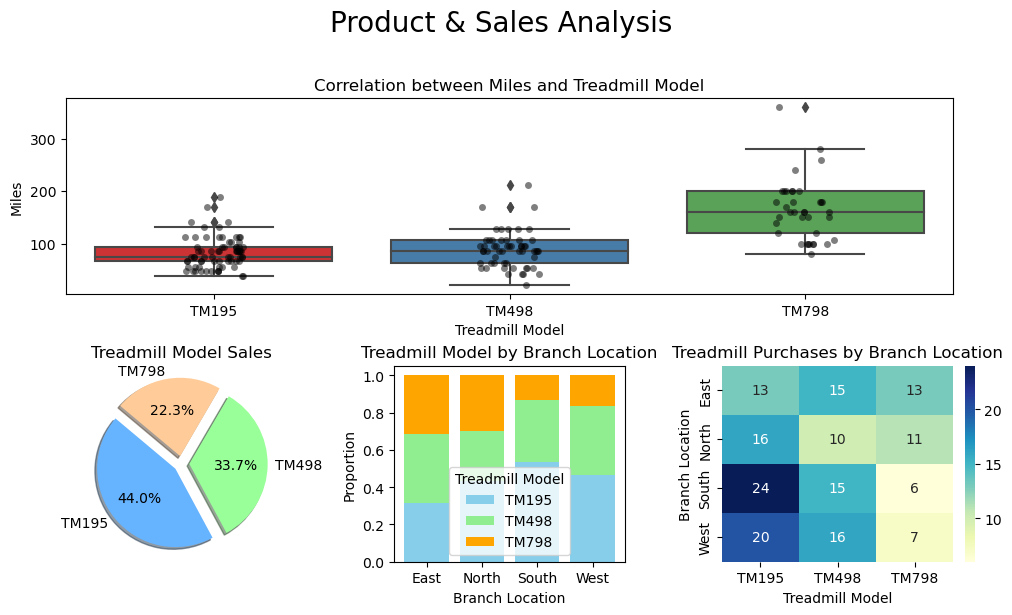

In [53]:
# Create a figure for the dashboard
fig = plt.figure(figsize=(10, 8), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=3, figure=fig)  # Adjust hspace and wspace as needed

# Define subplots and their corresponding positions
ax4 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 1])
ax1 = fig.add_subplot(gs[-2, -1])
ax3 = fig.add_subplot(gs[-2, -3])

# Visualization 1: Heatmap of treadmill purchases by branch
pivot_table = df.pivot_table(index='Branch', columns='Product', values='Income', aggfunc='count', fill_value=0)
sns.heatmap(data=pivot_table, annot=True, fmt='d', cmap='YlGnBu', ax=ax1)
ax1.set_title('Treadmill Purchases by Branch Location')
ax1.set_xlabel('Treadmill Model')
ax1.set_ylabel('Branch Location')

# Visualization 2: Stacked bar plot of choice of treadmill model by branch location
cross_tab = pd.crosstab(df['Branch'], df['Product'], normalize='index')
ax2.bar(cross_tab.index, cross_tab['TM195'], label='TM195', color='skyblue')
ax2.bar(cross_tab.index, cross_tab['TM498'], bottom=cross_tab['TM195'], label='TM498', color='lightgreen')
ax2.bar(cross_tab.index, cross_tab['TM798'], bottom=cross_tab['TM195'] + cross_tab['TM498'], label='TM798', color='orange')
ax2.set_title('Treadmill Model by Branch Location')
ax2.set_xlabel('Branch Location')
ax2.set_ylabel('Proportion')
ax2.legend(title='Treadmill Model')

# Visualization 3: Pie chart of percentage of sales for each treadmill model
sales_percentage = df['Product'].value_counts(normalize=True) * 100
ax3.pie(sales_percentage, labels=sales_percentage.index, autopct='%.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ffcc99'], explode=(0.1, 0.1, 0.1), shadow=True)
ax3.set_title('Treadmill Model Sales')

# Visualization 4: Box plot and strip plot of correlation between miles and treadmill model
sns.boxplot(data=df, x='Product', y='Miles', palette='Set1', ax=ax4)
sns.stripplot(data=df, x='Product', y='Miles', color='black', alpha=0.5, ax=ax4)
ax4.set_title('Correlation between Miles and Treadmill Model')
ax4.set_xlabel('Treadmill Model')
ax4.set_ylabel('Miles')

fig.suptitle("Product & Sales Analysis \n", fontsize=20)

# Show the dashboard
plt.show()

Figure 4.2 shows the Product and Sales Analysis Dashboard. This dashboard is used to provide viewers with a general understanding of the relationship between the Treadmill models and the sales. There are 4 visuals in this dashboard:

1. A combination of a box and whiskers plot and scatter plot
- This chart shows the Correlation between Average Miles and Treadmill Model
- This chart can be used to identify which treadmill model is more suited for the amount of miles intended.
2. Pie Chart
- This chart shows the percentage of each model that was sold for all sales
- This chart can help identify which treadmill model is more sought after
3. Stacked bar chart
- This chart shows the Choice of Treadmill Model for each location branch
- From this chart, we can put together that the model TM798 has the least purchases for each branch and customers prefer it less.
4. Heat Map
- This chart displays the number of treadmill purchases by branch and each model.
- This chart allows us to understand which treadmill model is more sought after in which branch how sought after it is.

## 4.3 Customer Analysis Dashboard <a id="part4.3"></a>

[Back To Top](#top)

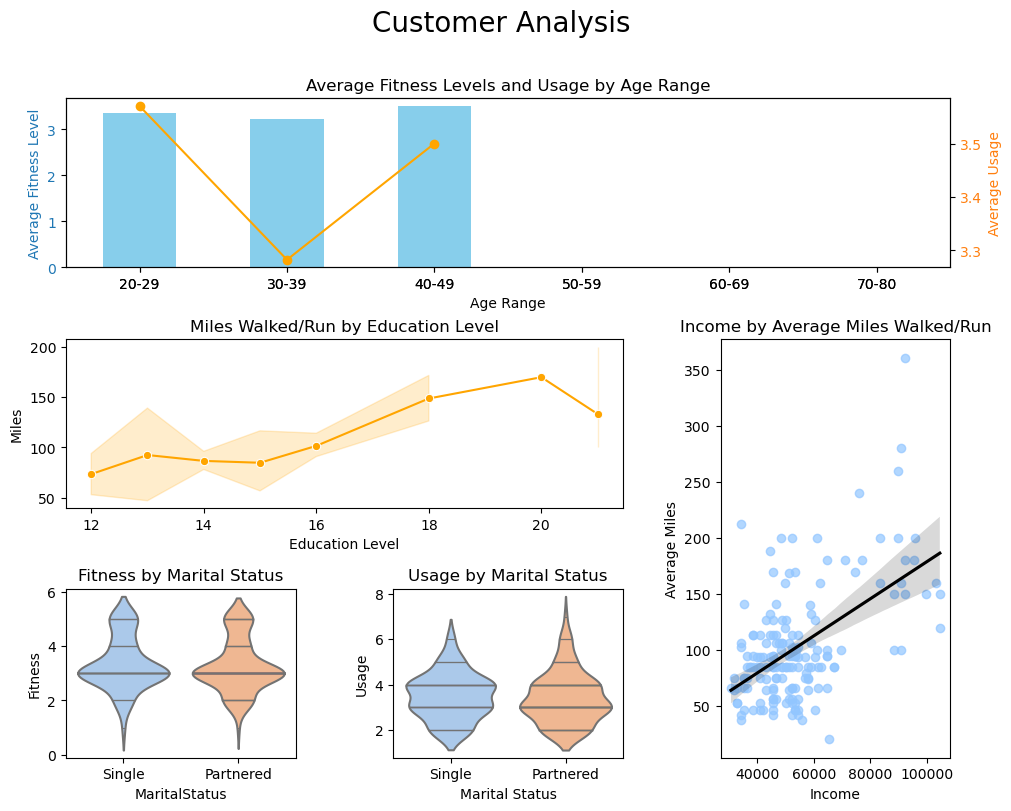

In [54]:
# Create a figure for the dashboard
fig = plt.figure(figsize=(10, 8), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=3, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[0, :], sharex=ax1, frameon=False)
ax3 = fig.add_subplot(gs[1:, -1])
ax6 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])
ax4 = fig.add_subplot(gs[1, :-1])

# Visualization 1: Clustered bar plot and line plot for average fitness levels and usage by age range
ax2.clear()
ax2.set_yticks([])  # Remove y-axis ticks
ax2.set_yticklabels([])  # Remove y-axis labels
ax2.set_xticks([])  # Remove x-axis ticks
ax2.set_xticklabels([])  # Remove x-axis labels


average_fitness_by_age = df.groupby('AgeRange')['Fitness'].mean()
average_usage_by_age = df.groupby('AgeRange')['Usage'].mean()
average_fitness_by_age.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Average Fitness Levels and Usage by Age Range')
ax1.set_xlabel('Age Range')
ax1.set_ylabel('Average Fitness Level', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2_twin = ax2.twinx()
average_usage_by_age.plot(kind='line', marker='o', color='orange', ax=ax2_twin)
ax2_twin.yaxis.tick_right()  # Adjust y-axis ticks to the right side
ax2_twin.yaxis.set_label_position('right')  # Move y-axis label to the right side
ax2_twin.set_ylabel('Average Usage', color='tab:orange')
ax2_twin.tick_params(axis='y', labelcolor='tab:orange')

# Visualization 2: Scatter plot with regression lines for impact of income on average miles walked/run
sns.regplot(data=df, x='Income', y='Miles', scatter_kws={'alpha': 0.7}, line_kws={'color': 'black'}, ax=ax3)
ax3.set_title('Income by Average Miles Walked/Run')
ax3.set_xlabel('Income')
ax3.set_ylabel('Average Miles')

# Visualization 3: Line graph for average miles walked/run by education level
sns.lineplot(data=df, x='Education', y='Miles', ax=ax4, color='orange', marker='o')
ax4.set_title('Miles Walked/Run by Education Level')
ax4.set_xlabel('Education Level')
ax4.set_ylabel('Miles')

# Visualization 4: Violin plots for usage behavior and fitness by marital status
sns.violinplot(data=df, x='MaritalStatus', y='Usage', ax=ax5, inner='stick', palette='pastel')
ax5.set_title('Usage by Marital Status')
ax5.set_xlabel('Marital Status')
ax5.set_ylabel('Usage')

sns.violinplot(data=df, x='MaritalStatus', y='Fitness', ax=ax6, inner='stick', palette='pastel')
ax6.yaxis.tick_left()
ax6.yaxis.set_label_position("left")
ax6.set_ylabel('Fitness')
ax6.set_title('Fitness by Marital Status')

fig.suptitle("Customer Analysis \n", fontsize=20)

# Show the dashboard
plt.show()


Figure 4.3 shows the Customer Analysis Dashboard. This dashboard is used to provide viewers with an understanding on the type of customers that are intrested and bought their treadmills. There are 5 visuals in this dashboard:

1. Dual Axis plot consisting of a bar chart and a line graph
- This chart shows the average fitness levels and usage over the range of ages.
- This chart helps me understand that ages 40-49 has the highest average fitness level however ages 20-29 has the highest average usage expected.
2. Line graph
- This chart shows how the education level impacts a customers expected average miles ran.
- This chart can help us understand that as the level of education increases, the customer expects to run more Miles. However, after the 20 year mark of education the expectation of miles ran decreases.
3. Scatter plot with regression lines
- This chart shows the average expected Miles walked/run against income for every customer.
- From this chart, we can put together that the Average expected miles walked/run by customers increases as their income increases
4. Violin Chart
- This chart shows how the marital status of a customer infulences their usage behaviour
- This chart allows us to deduce that the marital status does not really affect a customers fitness.
5. Violin Chart
- This chart shows how the marital status of a customer infulences their Fitness
- This allows viewers to deduce that the main portion of customers who are single plan to use the treadmill more than the main portion of customers who are partnered

# 4 Reflection <a id="part4"></a>

[Return To Top](#top)

The completion of this assignment on data visualization and data preparation has been a great learning experience. I have gained a deeper understanding of the importance of data preparation in data analysis and how it can impact the quality of results and insights. I have also learned about the various techniques for cleaning, transforming, and wrangling data to make it ready for visualization and analysis.

Working with Jupyter Notebook has been particularly useful, as it allows for an interactive and intuitive experience while working with data. The ability to execute code in cells and visualize outputs in real-time has made the data preparation process much more efficient and streamlined.

In addition, I have also learned about various data visualization techniques and tools, such as histograms, scatter plots, and heatmaps. I have come to appreciate the power of visualizing data, as it can help uncover patterns, relationships, and trends in the data that may not have been immediately apparent through statistical analysis alone.

Overall, this assignment has greatly enhanced my understanding of data visualization and data preparation, and I am confident that these skills will be invaluable in my future work with data.